# Parquet and GeoParquet

**Apachece Parquet** or Just Parquet is an open-source, column-oriented file format that makes it faster to retrieve data and uses less memory space for TAbular data, than CV. 

It is very popular for big data repositories

The geospation version of parquet for storing vector data is the **GeoParquet**.

This format comes from the necessity to have an efficient and standardized format to store big geospatial data efficiently.

Introduced in December of 2022.
## Catalog Search

Import all necessary libraries

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client
import planetary_computer

import contextily as ctx # for adding basemaps

We use the 2020 US Census Collection id `us-census` to look for the data in the MPC catalog

This collection has each tabular file as an item:

In [9]:
# open MPC Catalog

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# search whole collection
search = catalog.search(collections=["us-census"])

# retrieve items
items = {item.id: item for item in search.items()}  #for each item in the search,items, I want the key observation to be the item id 
#and the value of the observation to be the item itself


In [10]:
items

{'2020-census-blocks-population': <Item id=2020-census-blocks-population>,
 '2020-census-blocks-geo': <Item id=2020-census-blocks-geo>,
 '2020-cb_2020_us_vtd_500k': <Item id=2020-cb_2020_us_vtd_500k>,
 '2020-cb_2020_us_unsd_500k': <Item id=2020-cb_2020_us_unsd_500k>,
 '2020-cb_2020_us_ttract_500k': <Item id=2020-cb_2020_us_ttract_500k>,
 '2020-cb_2020_us_tract_500k': <Item id=2020-cb_2020_us_tract_500k>,
 '2020-cb_2020_us_tbg_500k': <Item id=2020-cb_2020_us_tbg_500k>,
 '2020-cb_2020_us_state_500k': <Item id=2020-cb_2020_us_state_500k>,
 '2020-cb_2020_us_sldu_500k': <Item id=2020-cb_2020_us_sldu_500k>,
 '2020-cb_2020_us_sldl_500k': <Item id=2020-cb_2020_us_sldl_500k>,
 '2020-cb_2020_us_scsd_500k': <Item id=2020-cb_2020_us_scsd_500k>,
 '2020-cb_2020_us_region_500k': <Item id=2020-cb_2020_us_region_500k>,
 '2020-cb_2020_us_place_500k': <Item id=2020-cb_2020_us_place_500k>,
 '2020-cb_2020_us_nectadiv_500k': <Item id=2020-cb_2020_us_nectadiv_500k>,
 '2020-cb_2020_us_necta_500k': <Item id=20

In [12]:
item = items['2020-cb_2020_us_county_500k']
item

id: 2020-cb_2020_us_county_500k
"bbox: [-179.148909, -14.548699, 179.77847, 71.365162]"
datetime: 2021-08-01T00:00:00Z
proj:epsg: 4269
"table:columns: [{'name': 'STATEFP', 'type': 'byte_array', 'description': 'State FIPS Code'}, {'name': 'COUNTYFP', 'type': 'byte_array', 'description': 'County FIPS code'}, {'name': 'COUNTYNS', 'type': 'byte_array'}, {'name': 'AFFGEOID', 'type': 'byte_array', 'description': 'American FactFinder summary level code + geovariant code + ""00US"" + GEOID'}, {'name': 'GEOID', 'type': 'byte_array', 'description': 'Concatenation of State FIPS and county FIPS code'}, {'name': 'NAME', 'type': 'byte_array', 'description': 'County name'}, {'name': 'NAMELSAD', 'type': 'byte_array', 'description': 'Name and Legal/statistical description'}, {'name': 'STUSPS', 'type': 'byte_array', 'description': 'FIPS State Postal Code'}, {'name': 'STATE_NAME', 'type': 'byte_array'}, {'name': 'LSAD', 'type': 'byte_array', 'description': 'Legal/statistical classification'}, {'name': 'ALAND', 'type': 'int64', 'description': 'Current land area'}, {'name': 'AWATER', 'type': 'int64', 'description': 'Current water area'}, {'name': 'geometry', 'type': 'byte_array', 'description': 'coordinates for County polygons'}]"
table:row_count: 3234
https://stac-extensions.github.io/table/v1.2.0/schema.json
https://stac-extensions.github.io/projection/v1.0.0/schema.json
href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root


Notice each item has a single asset 'data', this contains the URL o the GeoPandas file holding the information. Let's access the item's asset:

In [13]:
asset = item.assets['data']
asset

href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root
roles: ['data']
owner: 2020-cb_2020_us_county_500k
"table:storage_options: {'account_name': 'ai4edataeuwest', 'credential': 'st=2023-12-03T21%3A27%3A25Z&se=2023-12-11T21%3A27%3A25Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-12-04T21%3A27%3A24Z&ske=2023-12-11T21%3A27%3A24Z&sks=b&skv=2021-06-08&sig=wLrx9099WLZpPyOoN8Tvg8%2BohQXH34eViVLeZ34CeCU%3D'}"


## Opening GeoParquet

To open the parquet file we use the `gpd.read_parquet()` function using the assets URL pointing to the dataset:

In [14]:
counties = gpd.read_parquet(asset.href,
                           storage_options=asset.extra_fields['table:storage_options'])

In [16]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."
3,34,019,00882228,0500000US34019,34019,Hunterdon,Hunterdon County,NJ,New Jersey,06,1108086284,24761598,"POLYGON ((-75.19511 40.57969, -75.19466 40.581..."
4,21,147,00516926,0500000US21147,21147,McCreary,McCreary County,KY,Kentucky,06,1105416696,10730402,"POLYGON ((-84.77845 36.60329, -84.73068 36.665..."


In [17]:
type(counties)

geopandas.geodataframe.GeoDataFrame

## Contextily
This is a python library to add basemaps.

This retrieves tile maps from the internet and makes it possible to plot them alongslide our vector data.

**Example**

We want to plot the Santa Barbara county polygon together with a Basemap

In [18]:
sb = counties[counties.NAME == "Santa Barbara"]

<Axes: >

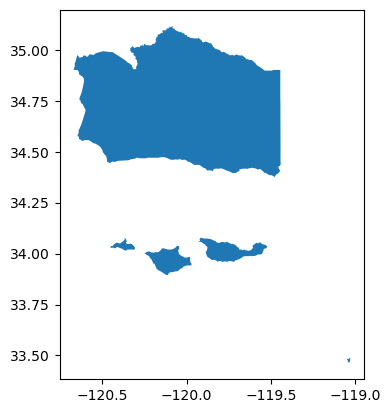

In [19]:
sb.plot()

Contetily's tiles can be reprojected to match the CRS of our vector data, but..
..it can be easier to repject your vector to EPSG 3857 instead

EPS 3857 is a projected CRS used for rendering maps online

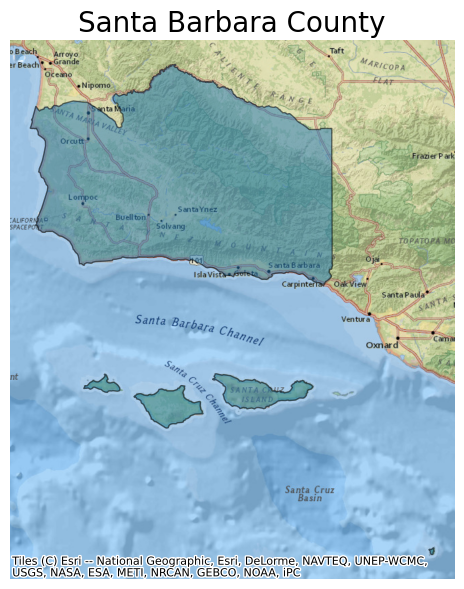

In [21]:
# create axis with plot
ax = (sb.to_crs(epsg=3857)
      .plot(figsize=(7, 7), alpha=0.5, edgecolor="k")
      )

# add basemap from contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)

# update axes
ax.set_title("Santa Barbara County", fontdict={"fontsize": "20"})
ax.set_axis_off()